In [1]:
import os
import re
from pathlib import Path
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import shutil
from collections import OrderedDict

In [2]:
"""Get the width and height of the terminal window.
"""

width, height = shutil.get_terminal_size((80, 20))

"""
    :param work_dir (str) : Current working directory
    :param main_dir (str) : Always be set to ./SuperBone_ver1
    :param output_dir (str) : The default directory where all outputs are stored
"""  

work_dir = os.getcwd()
main_dir = os.path.dirname(work_dir)
initial_dir = os.path.join(os.path.dirname(main_dir),'dcm_output','mechanical_txt')   
output_dir = os.path.join(main_dir,'analyze_figure')

unit = input('Please choose a unit (si or real)')
unit = unit.lower()
simulation = input('Please choose a simulation (LJ or LSM)')
simulation = simulation.upper()

import FileChooser

"""Initialize the class and set the initial directory, file type, and the type of file/folder to choose

    :param initial_dir (str) : Initial directory to open the file dialog
    :param file_type (str) : The type of file to select (e.g. "Image", "DICOM",...)
    :param choose_type (str) : The type of file/folder to select ("File", "Folder", "Multiple Files")
"""  

selector = FileChooser.Selector(initial_dir, file_type = "SS_TXT", choose_type = "Folder")

"""Open a file dialog windows and return the source path

    :param file_src_path (str) : The absolute path of the source image
"""

dir_src_path = selector.run()

Please choose a unit (si or real)real
Please choose a simulation (LJ or LSM)lsm
Import Folder : C:/Users/marsh/OneDrive/桌面/dcm_output/mechanical_txt


Plot file saved : real_LSM_cruve.png


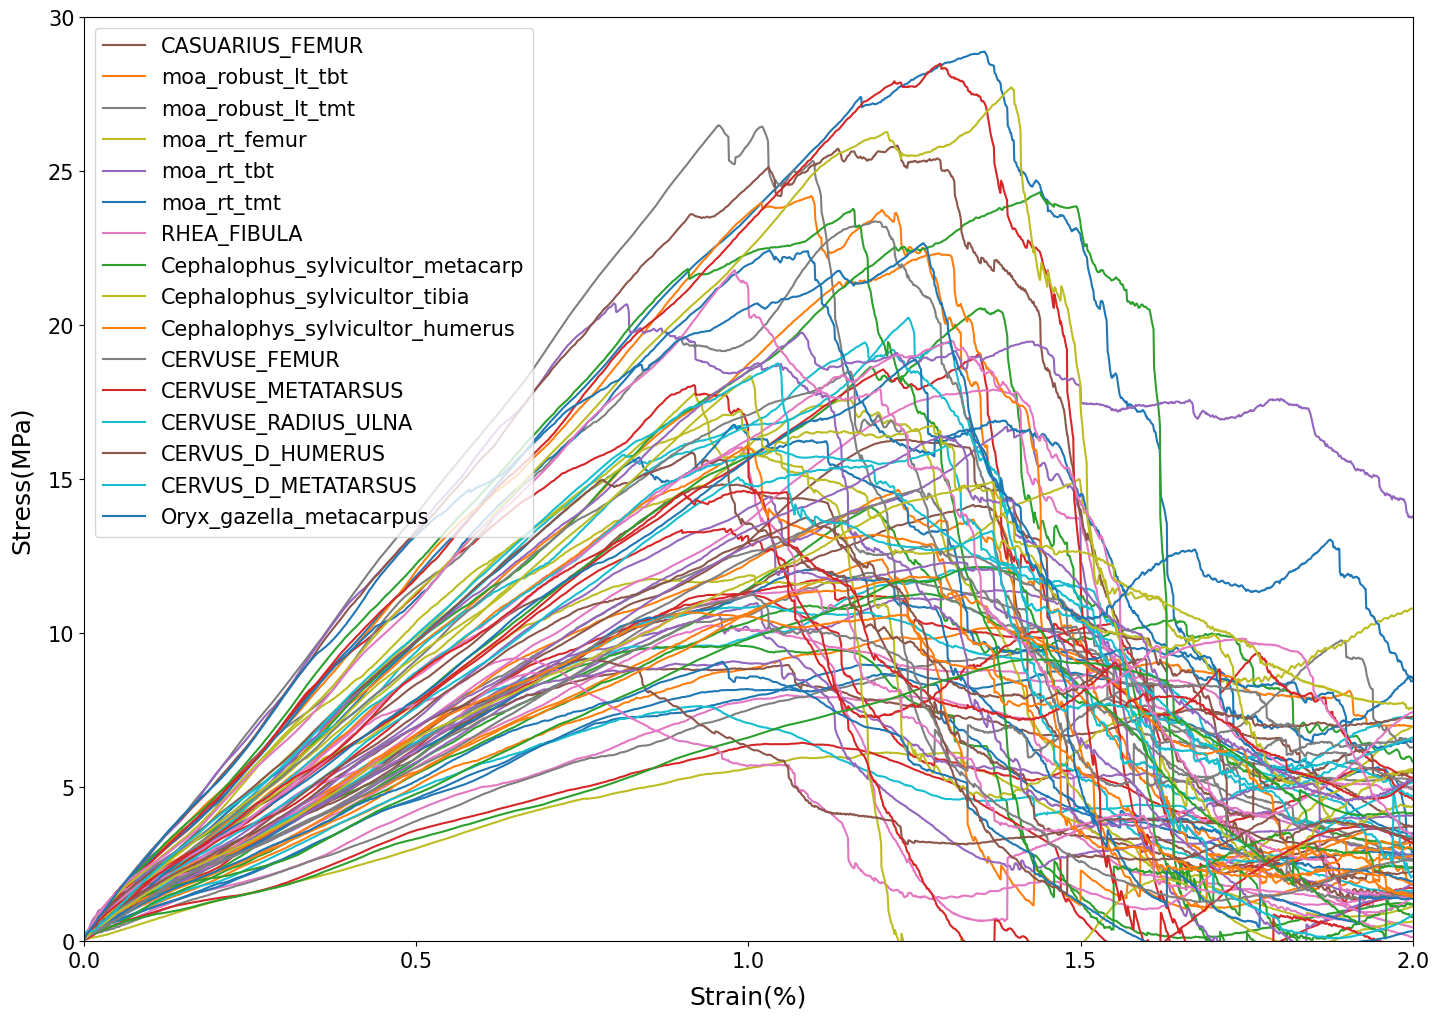

In [7]:
regex = re.compile(r'ss_(\w)_(.+)_ID\[(.+)\]_s\[(.+)\]_x\[(.+)\]_y\[(.+)\].+')
ss_files = [os.path.join(dir_src_path, file) for file in os.listdir(dir_src_path) 
           if re.search(r'.+{}_{}.txt'.format(unit, simulation),file)]
name_list = [regex.search(file).group(2) for file in os.listdir(dir_src_path) 
             if re.search(r'.+{}_{}.txt'.format(unit, simulation),file)]
name_list = list(set(name_list))

regex = re.compile(r'ss_(\w)_(.+)_ID\[(.+)\]_s\[(.+)\]_x\[(.+)\]_y\[(.+)\].+')
fig, ax = plt.subplots(figsize=plt.figaspect(0.7)*2.5)

for ss_file in ss_files:

    df = pd.read_csv(ss_file, sep='\s+')
    df = df[pd.to_numeric(df['exx'], errors='coerce').notnull()]
    exx = np.array(df['exx'], dtype='float32')
    sxx = np.array(df['sxx'], dtype='float32')
    
    label = regex.search(Path(ss_file).stem).group(2)
    ax.plot(exx,sxx,label=label)

plt.xlim(0, 0.02)
plt.xticks(np.arange(0,0.02+0.005,0.005),fontsize=15)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=1,symbol=''))

plt.ylim(0, 30)
plt.yticks(np.arange(0,30+5,5),fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),loc='best', fontsize=15)

plt.xlabel('Strain(%)',fontsize=18,labelpad=10)
plt.ylabel('Stress(MPa)',fontsize=18,labelpad=10)
'''
plt.plot(float(exx[np.where(sxx==np.max(sxx))]),np.max(sxx),'o',color='red')
plt.annotate("({:.2f}, {:.2f})".format(float(exx[np.where(sxx==np.max(sxx))])*100, np.max(sxx)),
xy=(float(exx[np.where(sxx==np.max(sxx))]),np.max(sxx)),
xytext=(float(exx[np.where(sxx==np.max(sxx))])+0.0005,np.max(sxx)+0.5),fontsize=15) 
'''
save_path = os.path.join(output_dir,'{}_{}_{}.png'.format(unit, simulation,'cruve'))
plt.savefig(save_path, bbox_inches='tight',facecolor = 'white',dpi=100)
print('Plot file saved : {}_{}_{}.png'.format(unit, simulation,'cruve'))

# plt.close()